In [1]:
#!/usr/bin/env python3
"""
Complete Figure Generation Script for Advanced Materials Journal
PSNP Impact on PBMC scRNA-seq Analysis

This script generates all main figures (3-6) according to FIGURES.md specifications
Figure 2 is generated in the main notebook (nano_figures.ipynb)
"""

import logging
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Try to import upsetplot
try:
    from upsetplot import UpSet, from_contents
except ImportError:
    logging.warning("upsetplot not found, installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'upsetplot'])
    from upsetplot import UpSet, from_contents

# ============================================================
# LOGGING CONFIGURATION
# ============================================================

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%H:%M:%S'
)
logger = logging.getLogger(__name__)

# ============================================================
# SETUP AND CONFIGURATION
# ============================================================

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

# Output directory
FIG_DIR = Path('./fig')
FIG_DIR.mkdir(exist_ok=True)

# Color palettes
SAMPLE_COLORS = {
    'sample_1': '#E64B35', '40nm': '#E64B35',
    'sample_2': '#4DBBD5', '200nm': '#4DBBD5',
    'sample_3': '#00A087', '40+200nm': '#00A087',
    'sample_4': '#808080', 'Untreated': '#808080'
}

CELL_TYPE_COLORS = {
    'B cell': '#F39B7F',
    'CD4+ T cell': '#8491B4',
    'Cytotoxic T cell': '#91D1C2',
    'CD14+ monocyte': '#DC0000',
    'Natural killer cell': '#7E6148'
}

REG_COLORS = {
    'Upregulated': '#E64B35',
    'Downregulated': '#4DBBD5',
    'Not Significant': '#B0B0B0'
}

SAMPLE_NAMES = {
    'sample_1': '40nm',
    'sample_2': '200nm',
    'sample_3': '40+200nm',
    'sample_4': 'Control'
}

CELL_TYPE_ORDER = [
    'B cell',
    'CD4+ T cell',
    'Cytotoxic T cell',
    'Natural killer cell',
    'CD14+ monocyte'
]

logger.info("Configuration loaded")
logger.info(f"Output directory: {FIG_DIR.absolute()}")

# ============================================================
# LOAD DATA
# ============================================================

# def load_data():
"""Load DE and GSE results from Excel files"""
logger.info("Loading differential expression and pathway enrichment results...")

# Load DE results
de_results_path = Path('./results/de_results_CoDi_dist.xlsx')
de_results = {}
if de_results_path.exists():
    logger.info(f"Loading DE results from {de_results_path}")
    excel_file = pd.ExcelFile(de_results_path)
    for sheet_name in excel_file.sheet_names:
        de_results[sheet_name] = excel_file.parse(sheet_name)
    logger.info(f"✓ Loaded {len(de_results)} DE result sheets")
else:
    logger.error(f"DE results file not found: {de_results_path}")
    raise FileNotFoundError(f"Required file not found: {de_results_path}")

# Load GSE results
gse_results_path = Path('./results/gse_results_CoDi_dist.xlsx')
gse_results = {}
if gse_results_path.exists():
    logger.info(f"Loading GSE results from {gse_results_path}")
    gse_file = pd.ExcelFile(gse_results_path)
    for sheet_name in gse_file.sheet_names:
        gse_results[sheet_name] = gse_file.parse(sheet_name)
    logger.info(f"✓ Loaded {len(gse_results)} GSE result sheets")
else:
    logger.warning(f"GSE results file not found: {gse_results_path}")

#     return de_results, gse_results

23:14:33 - INFO - Configuration loaded
23:14:33 - INFO - Output directory: /Users/vladimirk/repositories/nano/notebooks/fig
23:14:33 - INFO - Loading differential expression and pathway enrichment results...
23:14:33 - INFO - Loading DE results from results/de_results_CoDi_dist.xlsx
23:14:37 - INFO - ✓ Loaded 15 DE result sheets
23:14:37 - INFO - Loading GSE results from results/gse_results_CoDi_dist.xlsx
23:14:37 - INFO - ✓ Loaded 13 GSE result sheets


# ============================================================
# FIGURE 2: Size-dependent Transcriptional Impact
# ============================================================

23:03:44 - INFO - Creating Figure 2...
23:03:44 - INFO -   Panel 2A: DEG Burden...
23:03:44 - INFO -   Panel 2B: DEG vs Abundance...
23:03:44 - INFO -   Panel 2C: Directionality...
23:03:45 - INFO -   Panel 2D: UpSet-style overlap plot...
23:03:45 - INFO -     B cell_40nm: 1612 DEGs
23:03:45 - INFO -     B cell_200nm: 2312 DEGs
23:03:45 - INFO -     B cell_40+200nm: 474 DEGs
23:03:45 - INFO -     CD4+ T cell_40nm: 7222 DEGs
23:03:45 - INFO -     CD4+ T cell_200nm: 8138 DEGs
23:03:45 - INFO -     CD4+ T cell_40+200nm: 2688 DEGs
23:03:45 - INFO -     Cytotoxic T cell_40nm: 1927 DEGs
23:03:45 - INFO -     Cytotoxic T cell_200nm: 3414 DEGs
23:03:45 - INFO -     Cytotoxic T cell_40+200nm: 714 DEGs
23:03:45 - INFO -     Natural killer cell_40nm: 126 DEGs
23:03:45 - INFO -     Natural killer cell_200nm: 256 DEGs
23:03:45 - INFO -     Natural killer cell_40+200nm: 53 DEGs
23:03:45 - INFO -     CD14+ monocyte_40nm: 3529 DEGs
23:03:45 - INFO -     CD14+ monocyte_200nm: 5674 DEGs
23:03:45 - INFO 

ValueError: Image size of 117716x2450 pixels is too large. It must be less than 2^16 in each direction.

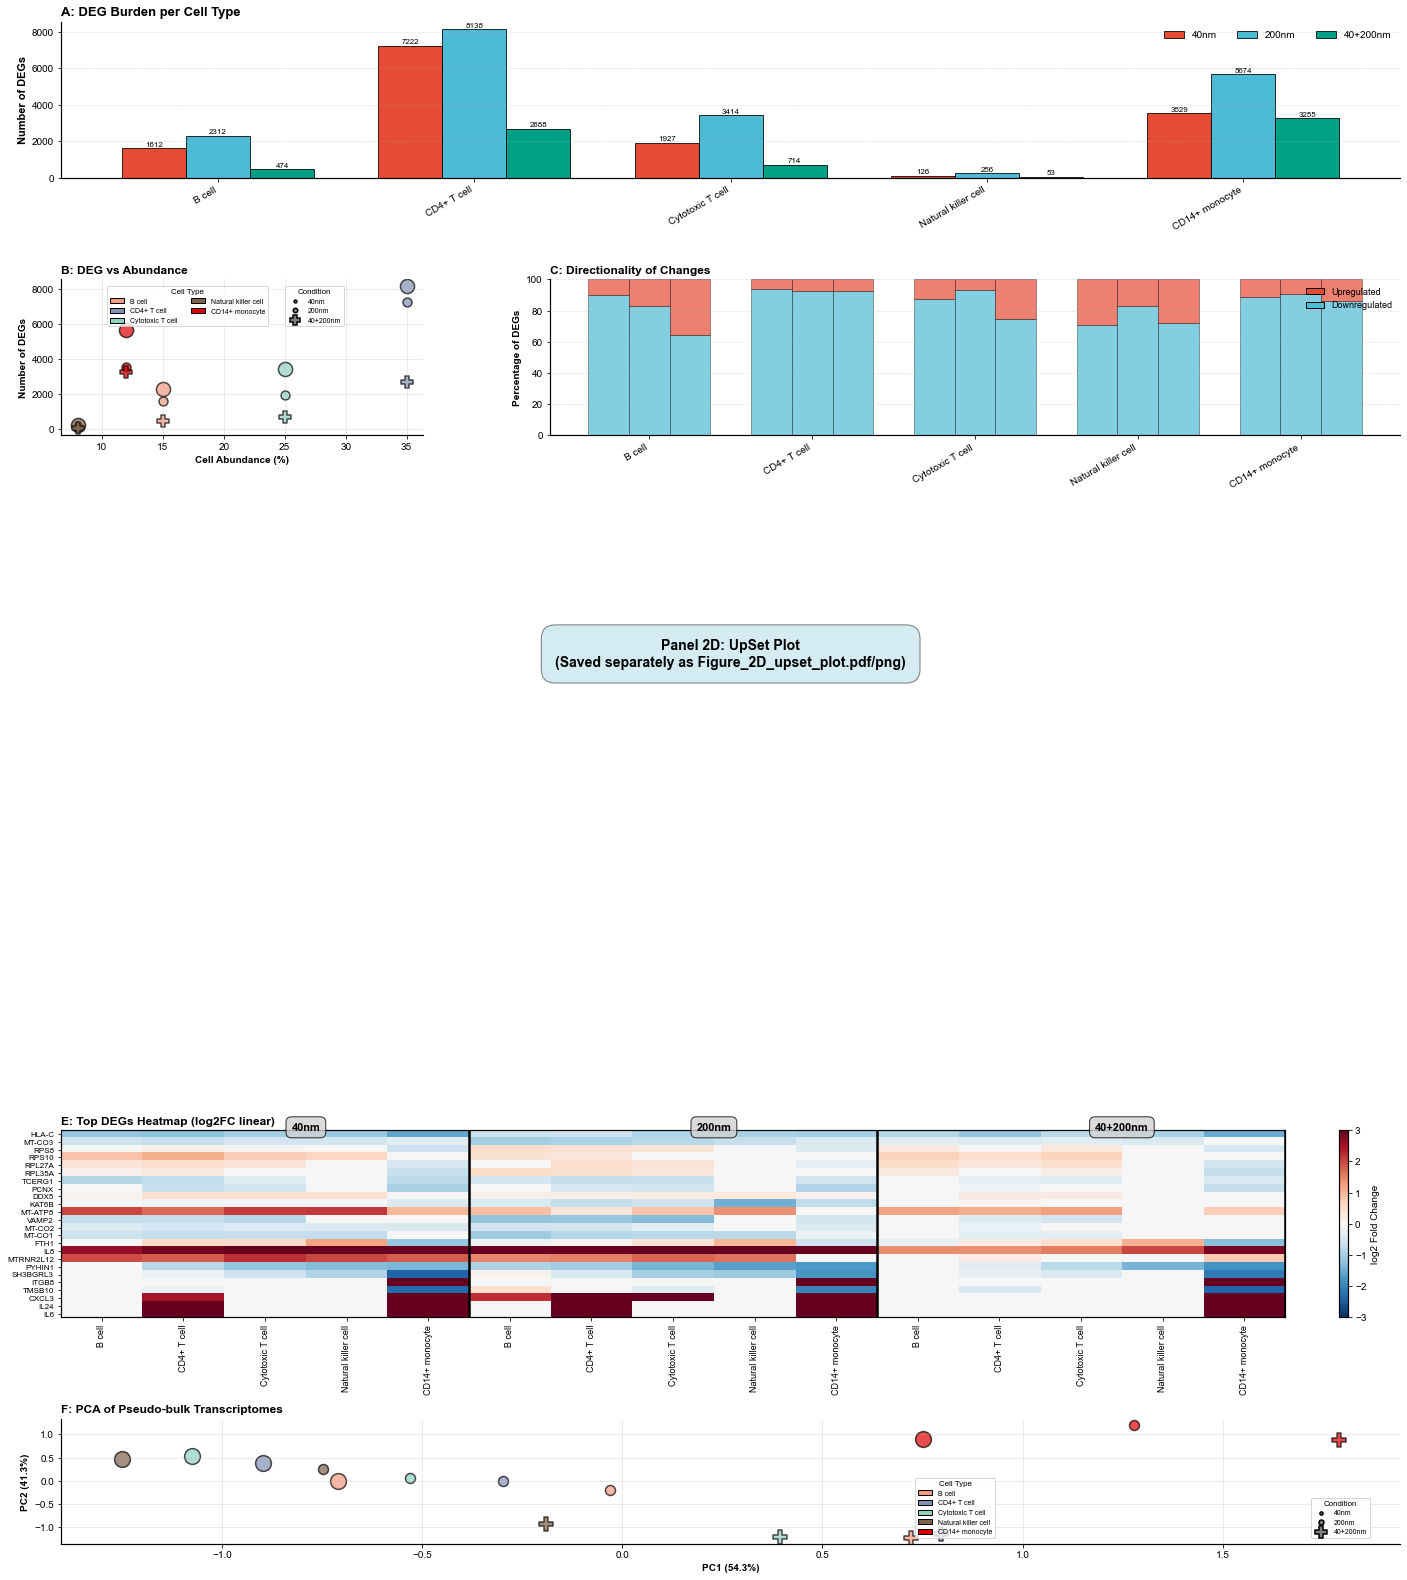

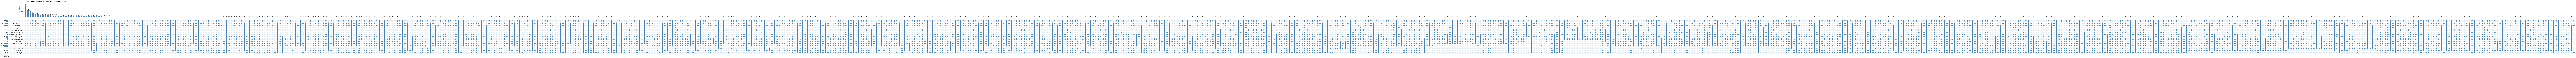

In [2]:
"""
FIGURE 2: Size-dependent transcriptional impact of PSNP exposure
All panels 2A-2F in one combined figure
"""
logger.info("Creating Figure 2...")

fig = plt.figure(figsize=(24, 28))
gs = fig.add_gridspec(6, 3, hspace=0.6, wspace=0.35, height_ratios=[1, 1, 1.5, 1, 1.2, 0.8])

# ============================================================
# Panel 2A: DEG Burden per Cell Type
# ============================================================
logger.info("  Panel 2A: DEG Burden...")
ax_2a = fig.add_subplot(gs[0, :])

deg_data = []
for sample_num, sample_name in [(1, '40nm'), (2, '200nm'), (3, '40+200nm')]:
    for ct in CELL_TYPE_ORDER:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
        if sheet_name in de_results:
            n_degs = len(de_results[sheet_name][de_results[sheet_name]['pvals_adj'] < 0.05])
            deg_data.append({'Cell Type': ct, 'Sample': sample_name, 'DEGs': n_degs})

deg_df = pd.DataFrame(deg_data)
x = np.arange(len(CELL_TYPE_ORDER))
width = 0.25
samples = ['40nm', '200nm', '40+200nm']

for i, sample in enumerate(samples):
    sample_data = deg_df[deg_df['Sample'] == sample]
    heights = [sample_data[sample_data['Cell Type'] == ct]['DEGs'].values[0]
               if len(sample_data[sample_data['Cell Type'] == ct]) > 0 else 0
               for ct in CELL_TYPE_ORDER]
    bars = ax_2a.bar(x + i*width - width, heights, width, label=sample,
                     color=SAMPLE_COLORS[sample], edgecolor='black', linewidth=0.8)

    for j, (bar, height) in enumerate(zip(bars, heights)):
        if height > 0:
            ax_2a.text(bar.get_x() + bar.get_width()/2, height + 50,
                      str(int(height)), ha='center', va='bottom', fontsize=8)

ax_2a.set_xticks(x)
ax_2a.set_xticklabels(CELL_TYPE_ORDER, rotation=30, ha='right', fontsize=10)
ax_2a.set_ylabel('Number of DEGs', fontweight='bold', fontsize=11)
ax_2a.set_title('A: DEG Burden per Cell Type', fontsize=13, fontweight='bold', loc='left')
ax_2a.legend(frameon=False, fontsize=10, ncol=3)
ax_2a.spines['top'].set_visible(False)
ax_2a.spines['right'].set_visible(False)
ax_2a.grid(axis='y', alpha=0.3, linestyle='--')

# ============================================================
# Panel 2B: DEG vs Cell Abundance
# ============================================================
logger.info("  Panel 2B: DEG vs Abundance...")
ax_2b = fig.add_subplot(gs[1, 0])

cell_abundance = {
    'B cell': 15.0,
    'CD4+ T cell': 35.0,
    'Cytotoxic T cell': 25.0,
    'Natural killer cell': 8.0,
    'CD14+ monocyte': 12.0
}

size_map = {'40nm': 80, '200nm': 200, '40+200nm': 140}

for ct in CELL_TYPE_ORDER:
    for sample in samples:
        sample_deg = deg_df[(deg_df['Cell Type'] == ct) & (deg_df['Sample'] == sample)]
        if len(sample_deg) > 0:
            x_val = cell_abundance.get(ct, 10)
            y_val = sample_deg['DEGs'].values[0]

            if sample == '40+200nm':
                ax_2b.scatter(x_val, y_val, s=size_map[sample], alpha=0.7,
                            color=CELL_TYPE_COLORS[ct], marker='P',
                            edgecolors='black', linewidths=1.5)
            else:
                ax_2b.scatter(x_val, y_val, s=size_map[sample], alpha=0.7,
                            color=CELL_TYPE_COLORS[ct], marker='o',
                            edgecolors='black', linewidths=1.5)

ax_2b.set_xlabel('Cell Abundance (%)', fontweight='bold')
ax_2b.set_ylabel('Number of DEGs', fontweight='bold')
ax_2b.set_title('B: DEG vs Abundance', fontsize=12, fontweight='bold', loc='left')
ax_2b.spines['top'].set_visible(False)
ax_2b.spines['right'].set_visible(False)
ax_2b.grid(alpha=0.3)

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

ct_legend = [Patch(facecolor=CELL_TYPE_COLORS[ct], label=ct, edgecolor='black')
             for ct in CELL_TYPE_ORDER]
leg1 = ax_2b.legend(handles=ct_legend, loc='upper center', fontsize=7,
                    bbox_to_anchor=(0.35, 0.98), ncol=2,
                    title='Cell Type', frameon=True, title_fontsize=8)

size_legend = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
                     markersize=np.sqrt(size_map['40nm']/10), label='40nm',
                     markeredgecolor='black', markeredgewidth=1.5),
               Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
                     markersize=np.sqrt(size_map['200nm']/10), label='200nm',
                     markeredgecolor='black', markeredgewidth=1.5),
               Line2D([0], [0], marker='P', color='w', markerfacecolor='gray',
                     markersize=10, label='40+200nm',
                     markeredgecolor='black', markeredgewidth=1.5)]
ax_2b.add_artist(leg1)
ax_2b.legend(handles=size_legend, loc='upper center', fontsize=7,
            bbox_to_anchor=(0.7, 0.98), ncol=1,
            title='Condition', frameon=True, title_fontsize=8)

# ============================================================
# Panel 2C: Directionality
# ============================================================
logger.info("  Panel 2C: Directionality...")
ax_2c = fig.add_subplot(gs[1, 1:])

direction_data = []
for sample_num, sample_name in [(1, '40nm'), (2, '200nm'), (3, '40+200nm')]:
    for ct in CELL_TYPE_ORDER:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
        if sheet_name in de_results:
            df = de_results[sheet_name]
            sig_df = df[df['pvals_adj'] < 0.05]
            n_up = len(sig_df[sig_df['logfoldchanges'] > 0])
            n_down = len(sig_df[sig_df['logfoldchanges'] < 0])
            total = n_up + n_down
            if total > 0:
                direction_data.append({
                    'Cell Type': ct,
                    'Sample': sample_name,
                    'Up %': (n_up / total) * 100,
                    'Down %': (n_down / total) * 100
                })

dir_df = pd.DataFrame(direction_data)
x = np.arange(len(CELL_TYPE_ORDER))
width = 0.25

for i, sample in enumerate(samples):
    sample_data = dir_df[dir_df['Sample'] == sample]
    up_vals = [sample_data[sample_data['Cell Type'] == ct]['Up %'].values[0]
               if len(sample_data[sample_data['Cell Type'] == ct]) > 0 else 0
               for ct in CELL_TYPE_ORDER]
    down_vals = [sample_data[sample_data['Cell Type'] == ct]['Down %'].values[0]
                 if len(sample_data[sample_data['Cell Type'] == ct]) > 0 else 0
                 for ct in CELL_TYPE_ORDER]

    pos = x + i*width - width
    ax_2c.bar(pos, down_vals, width,
              color=REG_COLORS['Downregulated'], edgecolor='black', linewidth=0.5, alpha=0.7)
    ax_2c.bar(pos, up_vals, width, bottom=down_vals,
              color=REG_COLORS['Upregulated'], edgecolor='black', linewidth=0.5, alpha=0.7)

ax_2c.set_xticks(x)
ax_2c.set_xticklabels(CELL_TYPE_ORDER, rotation=30, ha='right', fontsize=10)
ax_2c.set_ylabel('Percentage of DEGs', fontweight='bold')
ax_2c.set_title('C: Directionality of Changes', fontsize=12, fontweight='bold', loc='left')
ax_2c.set_ylim(0, 100)
ax_2c.spines['top'].set_visible(False)
ax_2c.spines['right'].set_visible(False)
ax_2c.grid(axis='y', alpha=0.3, linestyle='--')

legend_elements = [
    Patch(facecolor=REG_COLORS['Upregulated'], label='Upregulated', edgecolor='black'),
    Patch(facecolor=REG_COLORS['Downregulated'], label='Downregulated', edgecolor='black')
]
ax_2c.legend(handles=legend_elements, loc='upper right', fontsize=9, frameon=False)

# ============================================================
# ============================================================
# ============================================================
# Panel 2D: UpSet-style DEG Overlap Visualization
# ============================================================
# ============================================================
# Panel 2D: UpSet-style DEG Overlap Visualization
# ============================================================
logger.info("  Panel 2D: UpSet-style overlap plot...")

# Use the gridspec area for the UpSet-style plot
ax_2d = fig.add_subplot(gs[2, :])

# Collect all DEG sets: 5 cell types × 3 conditions = 15 sets
deg_sets_dict = {}
for ct in CELL_TYPE_ORDER:
    for sample_num, sample_name in [(1, '40nm'), (2, '200nm'), (3, '40+200nm')]:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
        if sheet_name in de_results:
            sig_genes = set(de_results[sheet_name][de_results[sheet_name]['pvals_adj'] < 0.05]['names'])
            key = f"{ct}_{sample_name}"
            deg_sets_dict[key] = sig_genes
            logger.info(f"    {key}: {len(sig_genes)} DEGs")

# Create UpSet plot data using upsetplot library
from upsetplot import from_contents, UpSet

upset_data = from_contents(deg_sets_dict)

# Create the UpSet plot - with smaller figure size to avoid rendering issues
fig_upset = plt.figure(figsize=(16, 6))  # Reduced from 20x8
upset = UpSet(upset_data, subset_size='count', show_counts=True,
             element_size=28, min_subset_size=1,
             facecolor='steelblue', sort_by='cardinality', sort_categories_by=None)
upset_axes_dict = upset.plot(fig=fig_upset)

# Add title
if 'intersections' in upset_axes_dict:
    upset_axes_dict['intersections'].set_title('D: DEG Overlap Across Cell Types and Conditions (UpSet)',
                                                fontsize=13, fontweight='bold', loc='left', pad=10)

# Save the UpSet plot separately - PDF only to avoid size issues
fig_upset.savefig(FIG_DIR / 'Figure_2D_upset_plot.pdf', bbox_inches='tight')
# Save PNG with lower DPI to avoid size issues
fig_upset.savefig(FIG_DIR / 'Figure_2D_upset_plot.png', dpi=150, bbox_inches='tight')
logger.info("  ✓ Saved Panel 2D as separate UpSet plot")

# For the main Figure 2, add a text placeholder in the 2D area
ax_2d.text(0.5, 0.5, 'Panel 2D: UpSet Plot\n(Saved separately as Figure_2D_upset_plot.pdf/png)',
          ha='center', va='center', fontsize=14, fontweight='bold',
          bbox=dict(boxstyle='round,pad=1', facecolor='lightblue', alpha=0.5))
ax_2d.set_xlim(0, 1)
ax_2d.set_ylim(0, 1)
ax_2d.axis('off')

# Panel 2E: Heatmap
# ============================================================
logger.info("  Panel 2E: Top DEGs Heatmap (log2FC_linear)...")
ax_2e = fig.add_subplot(gs[4, :])

top_genes_per_ct = {}
for ct in CELL_TYPE_ORDER:
    ct_genes = set()
    for sample_num in [1, 2, 3]:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
        if sheet_name in de_results:
            df = de_results[sheet_name]
            sig_df = df[df['pvals_adj'] < 0.05].copy()
            if len(sig_df) > 0:
                sig_df['abs_lfc'] = sig_df['logfoldchanges'].abs()
                top_6 = sig_df.nsmallest(6, 'pvals_adj')['names'].tolist()
                ct_genes.update(top_6)
    top_genes_per_ct[ct] = list(ct_genes)[:6]

all_top_genes = []
for ct in CELL_TYPE_ORDER:
    all_top_genes.extend(top_genes_per_ct[ct])
all_top_genes = list(dict.fromkeys(all_top_genes))[:30]

heatmap_data = []
column_labels = []

for sample_num, sample_name in [(1, '40nm'), (2, '200nm'), (3, '40+200nm')]:
    for ct in CELL_TYPE_ORDER:
        column_labels.append(ct)

condition_boundaries = [0, 5, 10, 15]

for gene in all_top_genes:
    gene_row = []
    for sample_num in [1, 2, 3]:
        for ct in CELL_TYPE_ORDER:
            sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
            if sheet_name in de_results:
                gene_data = de_results[sheet_name][de_results[sheet_name]['names'] == gene]
                if len(gene_data) > 0:
                    gene_row.append(gene_data['logfoldchanges'].values[0])
                else:
                    gene_row.append(0)
            else:
                gene_row.append(0)
    heatmap_data.append(gene_row)

heatmap_array = np.array(heatmap_data)

im = ax_2e.imshow(heatmap_array, cmap='RdBu_r', aspect='auto', vmin=-3, vmax=3)
ax_2e.set_yticks(range(len(all_top_genes)))
ax_2e.set_yticklabels(all_top_genes, fontsize=8)

ax_2e.set_xticks(range(len(column_labels)))
ax_2e.set_xticklabels(column_labels, fontsize=9, rotation=90, ha='center')
ax_2e.set_title('E: Top DEGs Heatmap (log2FC linear)', fontsize=12, fontweight='bold', loc='left')

cbar = plt.colorbar(im, ax=ax_2e, fraction=0.046, pad=0.04)
cbar.set_label('log2 Fold Change', fontsize=10)

for boundary in condition_boundaries[1:]:
    ax_2e.axvline(x=boundary-0.5, color='black', linewidth=2.5)

for i, cond in enumerate(['40nm', '200nm', '40+200nm']):
    x_center = condition_boundaries[i] + 2.5
    ax_2e.text(x_center, -1.5, cond, ha='center', va='top',
              fontsize=11, fontweight='bold',
              bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))

# ============================================================
# Panel 2F: PCA
# ============================================================
logger.info("  Panel 2F: PCA...")
ax_2f = fig.add_subplot(gs[5, :])

from sklearn.decomposition import PCA

all_genes = None
for sample_num in [1, 2, 3]:
    for ct in CELL_TYPE_ORDER:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
        if sheet_name in de_results:
            gene_set = set(de_results[sheet_name]['names'].values)
            if all_genes is None:
                all_genes = gene_set
            else:
                all_genes = all_genes.intersection(gene_set)

common_genes = list(all_genes)[:500]

pca_data = []
labels = []

for sample_num, sample_name in [(1, '40nm'), (2, '200nm'), (3, '40+200nm')]:
    for ct in CELL_TYPE_ORDER:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
        if sheet_name in de_results:
            df = de_results[sheet_name]
            features = []
            for gene in common_genes:
                gene_data = df[df['names'] == gene]
                if len(gene_data) > 0:
                    features.append(gene_data['logfoldchanges'].values[0])
                else:
                    features.append(0)
            pca_data.append(features)
            labels.append((sample_name, ct))

pca_array = np.array(pca_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_array)

size_map_pca = {'40nm': 100, '200nm': 250, '40+200nm': 175}

for i, (sample, ct) in enumerate(labels):
    marker = 'P' if sample == '40+200nm' else 'o'
    ax_2f.scatter(pca_result[i, 0], pca_result[i, 1],
                  s=size_map_pca[sample], alpha=0.7,
                  color=CELL_TYPE_COLORS[ct], marker=marker,
                  edgecolors='black', linewidths=1.5)

ax_2f.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontweight='bold')
ax_2f.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontweight='bold')
ax_2f.set_title('F: PCA of Pseudo-bulk Transcriptomes', fontsize=12, fontweight='bold', loc='left')
ax_2f.spines['top'].set_visible(False)
ax_2f.spines['right'].set_visible(False)
ax_2f.grid(alpha=0.3)

ct_legend = [Patch(facecolor=CELL_TYPE_COLORS[ct], label=ct, edgecolor='black')
             for ct in CELL_TYPE_ORDER]
leg1 = ax_2f.legend(handles=ct_legend, loc='lower right', fontsize=7,
                    bbox_to_anchor=(0.7, 0.02), ncol=1,
                    title='Cell Type', frameon=True, title_fontsize=8)

size_legend = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
                     markersize=np.sqrt(size_map_pca['40nm']/10), label='40nm',
                     markeredgecolor='black', markeredgewidth=1.5),
               Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
                     markersize=np.sqrt(size_map_pca['200nm']/10), label='200nm',
                     markeredgecolor='black', markeredgewidth=1.5),
               Line2D([0], [0], marker='P', color='w', markerfacecolor='gray',
                     markersize=12, label='40+200nm',
                     markeredgecolor='black', markeredgewidth=1.5)]
ax_2f.add_artist(leg1)
ax_2f.legend(handles=size_legend, loc='lower right', fontsize=7,
            bbox_to_anchor=(0.98, 0.02), ncol=1,
            title='Condition', frameon=True, title_fontsize=8)

plt.savefig(FIG_DIR / 'Figure_2_transcriptional_impact.pdf', bbox_inches='tight')
plt.savefig(FIG_DIR / 'Figure_2_transcriptional_impact.png', dpi=300, bbox_inches='tight')
logger.info("✓ Figure 2 complete\n")






# ============================================================
# FIGURE 3: 40nm PSNPs - Dominant Transcriptional Programs
# ============================================================

In [ ]:
def plot_pathway_progress_bars(ax, gse_results, cell_types, sample, title):
    """Helper function to create pathway progress bars colored by regulation direction"""
    pathway_data = []

    for ct in cell_types:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{['40nm', '200nm', '40+200nm'].index(sample) + 1}"
        if sheet_name in gse_results:
            df = gse_results[sheet_name]
            top_pathways = df.nsmallest(10, 'FDR q-val')

            for _, row in top_pathways.iterrows():
                # Get Tag % (gene ratio)
                gene_ratio = 0
                if 'Tag %' in row and pd.notna(row['Tag %']):
                    tag_str = str(row['Tag %'])
                    if '/' in tag_str:
                        parts = tag_str.split('/')
                        if len(parts) == 2:
                            try:
                                numerator = float(parts[0])
                                denominator = float(parts[1])
                                if denominator > 0:
                                    gene_ratio = numerator / denominator
                            except:
                                gene_ratio = 0
                    else:
                        try:
                            gene_ratio = float(tag_str.replace('%', '')) / 100.0
                        except:
                            gene_ratio = 0
                elif 'Gene %' in row and pd.notna(row['Gene %']):
                    try:
                        gene_ratio = float(str(row['Gene %']).replace('%', '')) / 100.0
                    except:
                        gene_ratio = 0

                # Get NES for direction
                nes = row.get('NES', 0)

                pathway_data.append({
                    'Cell Type': ct,
                    'Pathway': row['Term'][:50],
                    'NES': nes,
                    'FDR': row['FDR q-val'],
                    'Gene Ratio': gene_ratio * 100  # As percentage
                })

    if pathway_data:
        plot_df = pd.DataFrame(pathway_data)
        plot_df['Gene Ratio'] = pd.to_numeric(plot_df['Gene Ratio'], errors='coerce').fillna(0)

        pathways = plot_df['Pathway'].unique()[:15]
        y_pos = np.arange(len(pathways))

        bar_height = 0.6
        bar_width = 0.8

        for i, ct in enumerate(cell_types):
            ct_data = plot_df[plot_df['Cell Type'] == ct]
            for pathway in pathways:
                pathway_row = ct_data[ct_data['Pathway'] == pathway]
                if len(pathway_row) > 0:
                    y = list(pathways).index(pathway)
                    gene_pct = pathway_row['Gene Ratio'].values[0]
                    nes = pathway_row['NES'].values[0]

                    # Background bar
                    ax.add_patch(plt.Rectangle((i - bar_width/2, y - bar_height/2),
                                               bar_width, bar_height,
                                               facecolor='lightgray', edgecolor='black',
                                               linewidth=0.8, alpha=0.3))

                    # Filled portion - COLOR BY REGULATION DIRECTION
                    if gene_pct > 0:
                        # Blue for downregulation (NES < 0), Red for upregulation (NES > 0)
                        color = REG_COLORS['Downregulated'] if nes < 0 else REG_COLORS['Upregulated']

                        fill_width = bar_width * (gene_pct / 100.0)
                        ax.add_patch(plt.Rectangle((i - bar_width/2, y - bar_height/2),
                                                   fill_width, bar_height,
                                                   facecolor=color, edgecolor='black',
                                                   linewidth=0.8, alpha=0.8))

                        ax.text(i, y, f'{gene_pct:.0f}%', ha='center', va='center',
                               fontsize=6, fontweight='bold',
                               color='white' if gene_pct > 50 else 'black')

        ax.set_yticks(y_pos)
        ax.set_yticklabels(pathways, fontsize=8)
        ax.set_xticks(np.arange(len(cell_types)))
        ax.set_xticklabels([ct.replace(' ', '\n') for ct in cell_types], fontsize=9)
        ax.set_xlim(-0.5, len(cell_types) - 0.5)
        ax.set_title(title, fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3, linestyle='--', axis='y')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


# Create Figure 3
logger.info("Creating Figure 3 (40nm PSNPs)...")

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)

# Panels 3A & 3B: Volcano plots
for idx, cell_type in enumerate(['CD14+ monocyte', 'Natural killer cell']):
    ax = fig.add_subplot(gs[0, idx])
    sheet_name = f"{cell_type.replace(' ', '_')}_sample_1"

    if sheet_name in de_results:
        df = de_results[sheet_name].copy()
        df['significance'] = 'Not Significant'
        df.loc[(df['logfoldchanges'] > 0) & (df['pvals_adj'] < 0.05), 'significance'] = 'Upregulated'
        df.loc[(df['logfoldchanges'] < 0) & (df['pvals_adj'] < 0.05), 'significance'] = 'Downregulated'
        df['pvals_adj_plot'] = df['pvals_adj'].apply(lambda x: max(x, 1e-50))

        for sig, color in [('Not Significant', REG_COLORS['Not Significant']),
                          ('Downregulated', REG_COLORS['Downregulated']),
                          ('Upregulated', REG_COLORS['Upregulated'])]:
            subset = df[df['significance'] == sig]
            ax.scatter(subset['logfoldchanges'], -np.log10(subset['pvals_adj_plot']),
                      s=20, alpha=0.6, color=color, label=sig, edgecolors='none')

        genes_to_label = ['GSN', 'MT-CO2', 'TNFAIP3', 'SH3BGRL3']
        for gene in genes_to_label:
            gene_data = df[df['names'] == gene]
            if len(gene_data) > 0 and gene_data['pvals_adj'].values[0] < 0.05:
                x = gene_data['logfoldchanges'].values[0]
                y = -np.log10(max(gene_data['pvals_adj'].values[0], 1e-50))
                ax.annotate(gene, xy=(x, y), xytext=(5, 5), textcoords='offset points',
                           fontsize=8, bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.7))

        ax.axhline(y=-np.log10(0.05), color='green', linestyle='--', linewidth=1, alpha=0.7)
        ax.set_xlabel('log2 Fold Change (linear)', fontsize=11, fontweight='bold')
        ax.set_ylabel('-Log10 Adjusted P-value', fontsize=11, fontweight='bold')
        ax.set_title(f"{'A' if idx==0 else 'B'}: {cell_type} (40nm)", fontsize=12, fontweight='bold')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if idx == 0:
            ax.legend(frameon=False, fontsize=8)

        logger.info(f"  Panel 3{'A' if idx==0 else 'B'}: {len(df[df['significance']!='Not Significant'])} DEGs")

# Panel 3C: Innate cells - PROGRESS BARS (colored by regulation direction)
ax = fig.add_subplot(gs[1, 0])
innate_cells = ['CD14+ monocyte', 'Natural killer cell']
plot_pathway_progress_bars(ax, gse_results, innate_cells, '40nm', title="C: Innate Immune Cells")

# Panel 3D: Adaptive cells - PROGRESS BARS (colored by regulation direction)
ax = fig.add_subplot(gs[1, 1])
adaptive_cells = ['B cell', 'CD4+ T cell', 'Cytotoxic T cell']
plot_pathway_progress_bars(ax, gse_results, adaptive_cells, '40nm', title="D: Adaptive Immune Cells")

plt.savefig(FIG_DIR / 'Figure_3_40nm_analysis.pdf', bbox_inches='tight')
plt.savefig(FIG_DIR / 'Figure_3_40nm_analysis.png', dpi=300, bbox_inches='tight')
logger.info("✓ Figure 3 complete\n")



# ============================================================
# FIGURE 4: 200nm PSNPs - Broad Transcriptional Perturbation
# ============================================================

23:25:31 - INFO - Creating Figure 4 (200nm PSNPs)...
23:25:31 - INFO -   Panel 4A: DEG Burden (200nm)...
23:25:31 - INFO -     200nm: 19794 total DEGs (1783 up, 18011 down)
23:25:31 - INFO -   Panel 4B: Pathway count barplot...
23:25:31 - INFO -     200nm: 5 total pathways (2 up, 3 down)
23:25:31 - INFO -   Panel 4C: Effect size comparison (3 conditions)...
23:25:31 - INFO -     40nm: median |logFC| = 0.78, n=3524
23:25:31 - INFO -     200nm: median |logFC| = 0.63, n=5672
23:25:31 - INFO -     40+200nm: median |logFC| = 0.81, n=3249
23:25:33 - INFO - ✓ Figure 4 complete



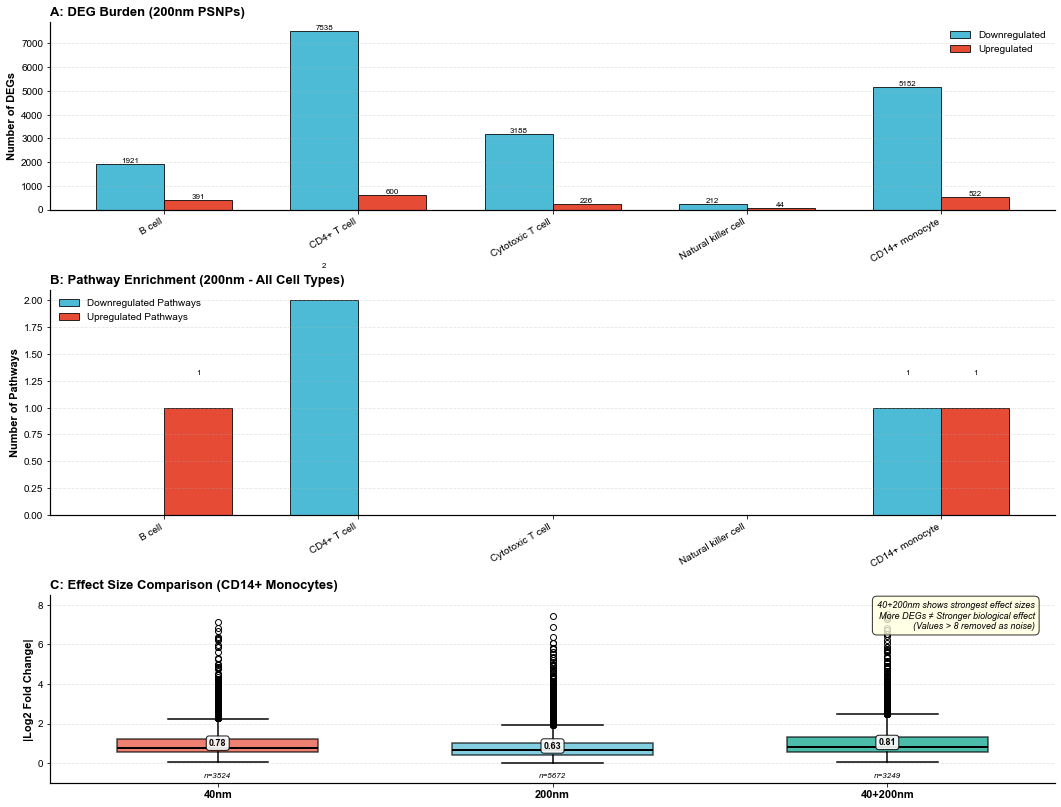

In [2]:
# ============================================================
# FIGURE 4: 200nm PSNPs - Broad Transcriptional Perturbation
# ============================================================
logger.info("Creating Figure 4 (200nm PSNPs)...")

fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(3, 1, hspace=0.4, height_ratios=[1, 1.2, 1])

# ============================================================
# Panel 4A: DEG Burden Overview (200nm)
# ============================================================
logger.info("  Panel 4A: DEG Burden (200nm)...")
ax_4a = fig.add_subplot(gs[0])

deg_counts = []
for ct in CELL_TYPE_ORDER:
    sheet_name = f"{ct.replace(' ', '_')}_sample_2"  # 200nm = sample_2
    if sheet_name in de_results:
        n_up = len(de_results[sheet_name][(de_results[sheet_name]['pvals_adj'] < 0.05) &
                                          (de_results[sheet_name]['logfoldchanges'] > 0)])
        n_down = len(de_results[sheet_name][(de_results[sheet_name]['pvals_adj'] < 0.05) &
                                            (de_results[sheet_name]['logfoldchanges'] < 0)])
        deg_counts.append({'Cell Type': ct, 'Up': n_up, 'Down': n_down})

if deg_counts:
    df = pd.DataFrame(deg_counts)
    x = np.arange(len(df))
    width = 0.35

    bars_down = ax_4a.bar(x - width/2, df['Down'], width, label='Downregulated',
                          color=REG_COLORS['Downregulated'], edgecolor='black', linewidth=0.8)
    bars_up = ax_4a.bar(x + width/2, df['Up'], width, label='Upregulated',
                        color=REG_COLORS['Upregulated'], edgecolor='black', linewidth=0.8)

    # Add count labels
    for bars in [bars_down, bars_up]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax_4a.text(bar.get_x() + bar.get_width()/2, height + 20,
                          str(int(height)), ha='center', va='bottom', fontsize=8)

    ax_4a.set_xticks(x)
    ax_4a.set_xticklabels(df['Cell Type'], rotation=30, ha='right', fontsize=10)
    ax_4a.set_ylabel('Number of DEGs', fontweight='bold', fontsize=11)
    ax_4a.set_title('A: DEG Burden (200nm PSNPs)', fontsize=13, fontweight='bold', loc='left')
    ax_4a.legend(frameon=False, fontsize=10)
    ax_4a.spines['top'].set_visible(False)
    ax_4a.spines['right'].set_visible(False)
    ax_4a.grid(axis='y', alpha=0.3, linestyle='--')

    total_degs = df['Up'].sum() + df['Down'].sum()
    logger.info(f"    200nm: {total_degs} total DEGs ({df['Up'].sum()} up, {df['Down'].sum()} down)")

# ============================================================
# ============================================================
# Panel 4B: Pathway Count Barplot (Number of Pathways - Up vs Down)
# ============================================================
logger.info("  Panel 4B: Pathway count barplot...")
ax_4b = fig.add_subplot(gs[1])

# Same pathway themes as Figure 3C
pathway_themes = {
    'Actin cytoskeleton': ['actin', 'cytoskeleton', 'phagocytosis'],
    'Mitochondrial': ['mitochondrial', 'oxidative', 'respiration', 'ATP'],
    'NF-κB signaling': ['NF-kB', 'TNF', 'inflammatory'],
    'Stress response': ['stress', 'response', 'DNA damage'],
    'Transcription': ['transcription', 'RNA processing', 'gene expression']
}

# Count pathways for 200nm (sample_2) per cell type
pathway_counts = []
for ct in CELL_TYPE_ORDER:
    sheet_name = f"{ct.replace(' ', '_')}_sample_2"
    if sheet_name in gse_results:
        df = gse_results[sheet_name]
        if len(df) > 0:
            # Filter for significant pathways (FDR < 0.05)
            sig_pathways = df[df['FDR q-val'] < 0.05]

            # Count upregulated (NES > 0) and downregulated (NES < 0) pathways
            # that match any of our themes
            all_keywords = []
            for keywords in pathway_themes.values():
                all_keywords.extend(keywords)

            themed_pathways = sig_pathways[
                sig_pathways['Term'].str.lower().str.contains('|'.join(all_keywords), na=False)
            ]

            n_up = len(themed_pathways[themed_pathways['NES'] > 0])
            n_down = len(themed_pathways[themed_pathways['NES'] < 0])

            pathway_counts.append({
                'Cell Type': ct,
                'Upregulated': n_up,
                'Downregulated': n_down
            })
        else:
            pathway_counts.append({
                'Cell Type': ct,
                'Upregulated': 0,
                'Downregulated': 0
            })
    else:
        pathway_counts.append({
            'Cell Type': ct,
            'Upregulated': 0,
            'Downregulated': 0
        })

if pathway_counts:
    df = pd.DataFrame(pathway_counts)
    x = np.arange(len(df))
    width = 0.35

    # Create split bar plot (up vs down)
    bars_down = ax_4b.bar(x - width/2, df['Downregulated'], width,
                          label='Downregulated Pathways',
                          color=REG_COLORS['Downregulated'], edgecolor='black', linewidth=0.8)
    bars_up = ax_4b.bar(x + width/2, df['Upregulated'], width,
                        label='Upregulated Pathways',
                        color=REG_COLORS['Upregulated'], edgecolor='black', linewidth=0.8)

    # Add count labels
    for bars in [bars_down, bars_up]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax_4b.text(bar.get_x() + bar.get_width()/2, height + 0.3,
                          str(int(height)), ha='center', va='bottom', fontsize=8)

    ax_4b.set_xticks(x)
    ax_4b.set_xticklabels(df['Cell Type'], rotation=30, ha='right', fontsize=10)
    ax_4b.set_ylabel('Number of Pathways', fontweight='bold', fontsize=11)
    ax_4b.set_title('B: Pathway Enrichment (200nm - All Cell Types)',
                    fontsize=13, fontweight='bold', loc='left')
    ax_4b.legend(frameon=False, fontsize=10, loc='upper left')
    ax_4b.spines['top'].set_visible(False)
    ax_4b.spines['right'].set_visible(False)
    ax_4b.grid(axis='y', alpha=0.3, linestyle='--')

    total_pathways = df['Upregulated'].sum() + df['Downregulated'].sum()
    logger.info(f"    200nm: {total_pathways} total pathways ({df['Upregulated'].sum()} up, {df['Downregulated'].sum()} down)")
else:
    # Fallback if no pathway data
    ax_4b.text(0.5, 0.5, 'Pathway enrichment data not available for 200nm',
              ha='center', va='center', transform=ax_4b.transAxes, fontsize=12)
    ax_4b.set_title('B: Pathway Enrichment (200nm)', fontsize=13, fontweight='bold', loc='left')
    ax_4b.axis('off')

# ============================================================
# Panel 4C: Effect Size Comparison (40nm vs 200nm vs 40+200nm)
# ============================================================
logger.info("  Panel 4C: Effect size comparison (3 conditions)...")
ax_4c = fig.add_subplot(gs[2])

# Compare effect sizes for monocytes across all 3 conditions
effect_sizes = []
for sample_num, sample_name in [(1, '40nm'), (2, '200nm'), (3, '40+200nm')]:
    sheet_name = f"CD14+_monocyte_sample_{sample_num}"
    if sheet_name in de_results:
        sig_df = de_results[sheet_name][de_results[sheet_name]['pvals_adj'] < 0.05]
        log_fcs = sig_df['logfoldchanges'].abs().values

        # Remove values > 8 (noise)
        log_fcs_filtered = log_fcs[log_fcs <= 8]

        for lfc in log_fcs_filtered:
            effect_sizes.append({'Sample': sample_name, '|log2FC|': lfc})

if effect_sizes:
    df = pd.DataFrame(effect_sizes)

    # Boxplot with 3 CONDITIONS
    data_40 = df[df['Sample'] == '40nm']['|log2FC|'].values
    data_200 = df[df['Sample'] == '200nm']['|log2FC|'].values
    data_mix = df[df['Sample'] == '40+200nm']['|log2FC|'].values

    bp = ax_4c.boxplot([data_40, data_200, data_mix],
                        positions=[0, 1, 2],
                        widths=0.6,
                        patch_artist=True,
                        showmeans=True,
                        meanprops=dict(marker='D', markerfacecolor='red', markersize=6),
                        medianprops=dict(color='black', linewidth=2),
                        boxprops=dict(linewidth=1.5),
                        whiskerprops=dict(linewidth=1.5),
                        capprops=dict(linewidth=1.5))

    # Color boxes with 3 COLORS
    colors = [SAMPLE_COLORS['40nm'], SAMPLE_COLORS['200nm'], SAMPLE_COLORS['40+200nm']]
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    # Add median annotations
    medians = [np.median(data_40), np.median(data_200), np.median(data_mix)]
    for i, (median, data) in enumerate([(medians[0], data_40),
                                        (medians[1], data_200),
                                        (medians[2], data_mix)]):
        ax_4c.text(i, median, f'{median:.2f}', ha='center', va='bottom',
                  fontsize=9, fontweight='bold',
                  bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))
        # Add n counts
        ax_4c.text(i, -0.5, f'n={len(data)}', ha='center', va='top',
                  fontsize=8, style='italic')

    ax_4c.set_xticks([0, 1, 2])
    ax_4c.set_xticklabels(['40nm', '200nm', '40+200nm'], fontsize=11, fontweight='bold')
    ax_4c.set_ylabel('|Log2 Fold Change|', fontweight='bold', fontsize=11)
    ax_4c.set_title('C: Effect Size Comparison (CD14+ Monocytes)',
                    fontsize=13, fontweight='bold', loc='left')
    ax_4c.set_ylim(-1, 8.5)
    ax_4c.spines['top'].set_visible(False)
    ax_4c.spines['right'].set_visible(False)
    ax_4c.grid(axis='y', alpha=0.3, linestyle='--')

    # Add interpretation text
    max_median_idx = np.argmax(medians)
    condition_names = ['40nm', '200nm', '40+200nm']
    interpretation = f"{condition_names[max_median_idx]} shows strongest effect sizes\nMore DEGs ≠ Stronger biological effect\n(Values > 8 removed as noise)"
    ax_4c.text(0.98, 0.97, interpretation, ha='right', va='top',
              transform=ax_4c.transAxes, fontsize=9, style='italic',
              bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.8))

    logger.info(f"    40nm: median |logFC| = {medians[0]:.2f}, n={len(data_40)}")
    logger.info(f"    200nm: median |logFC| = {medians[1]:.2f}, n={len(data_200)}")
    logger.info(f"    40+200nm: median |logFC| = {medians[2]:.2f}, n={len(data_mix)}")

plt.savefig(FIG_DIR / 'Figure_4_200nm_analysis.pdf', bbox_inches='tight')
plt.savefig(FIG_DIR / 'Figure_4_200nm_analysis.png', dpi=300, bbox_inches='tight')
logger.info("✓ Figure 4 complete\n")





# ============================================================
# FIGURE 5: Adaptive Immune Cells - Restrained and Lineage-specific Responses
# ============================================================
 
 Figure 5 demonstrates that B cells and CD4+ T cells exhibit transcriptional 
 responses that are more restrained and lineage-specific compared to innate cells.
 
 Panel 5A: DEG burden in adaptive immune cells (B cells, CD4+ T cells) across conditions
 Panel 5B: Lineage-specific gene modulation (MS4A1, CD79A, CD74, CCR7, LTB, RPL7, RPS6)
 Panel 5C: Pathway enrichment showing limited coherence in adaptive cells

23:01:48 - INFO - Creating Figure 5 (Adaptive immune cells)...
23:01:48 - INFO -   Panel 5A: DEG burden in B cells and CD4+ T cells...
23:01:48 - INFO -     B cell - 40nm: 1612 DEGs (164 up, 1448 down)
23:01:48 - INFO -     CD4+ T cell - 40nm: 7222 DEGs (441 up, 6781 down)
23:01:48 - INFO -     B cell - 200nm: 2312 DEGs (391 up, 1921 down)
23:01:48 - INFO -     CD4+ T cell - 200nm: 8138 DEGs (600 up, 7538 down)
23:01:48 - INFO -     B cell - 40+200nm: 474 DEGs (170 up, 304 down)
23:01:48 - INFO -     CD4+ T cell - 40+200nm: 2688 DEGs (200 up, 2488 down)
23:01:48 - INFO -   Panel 5B: Lineage-specific transcriptional modulation...
23:01:48 - INFO -   Panel 5C: Pathway enrichment in adaptive cells...
23:01:48 - INFO -     Plotted 6 pathway-cell type combinations
23:01:51 - INFO - ✓ Figure 5 complete



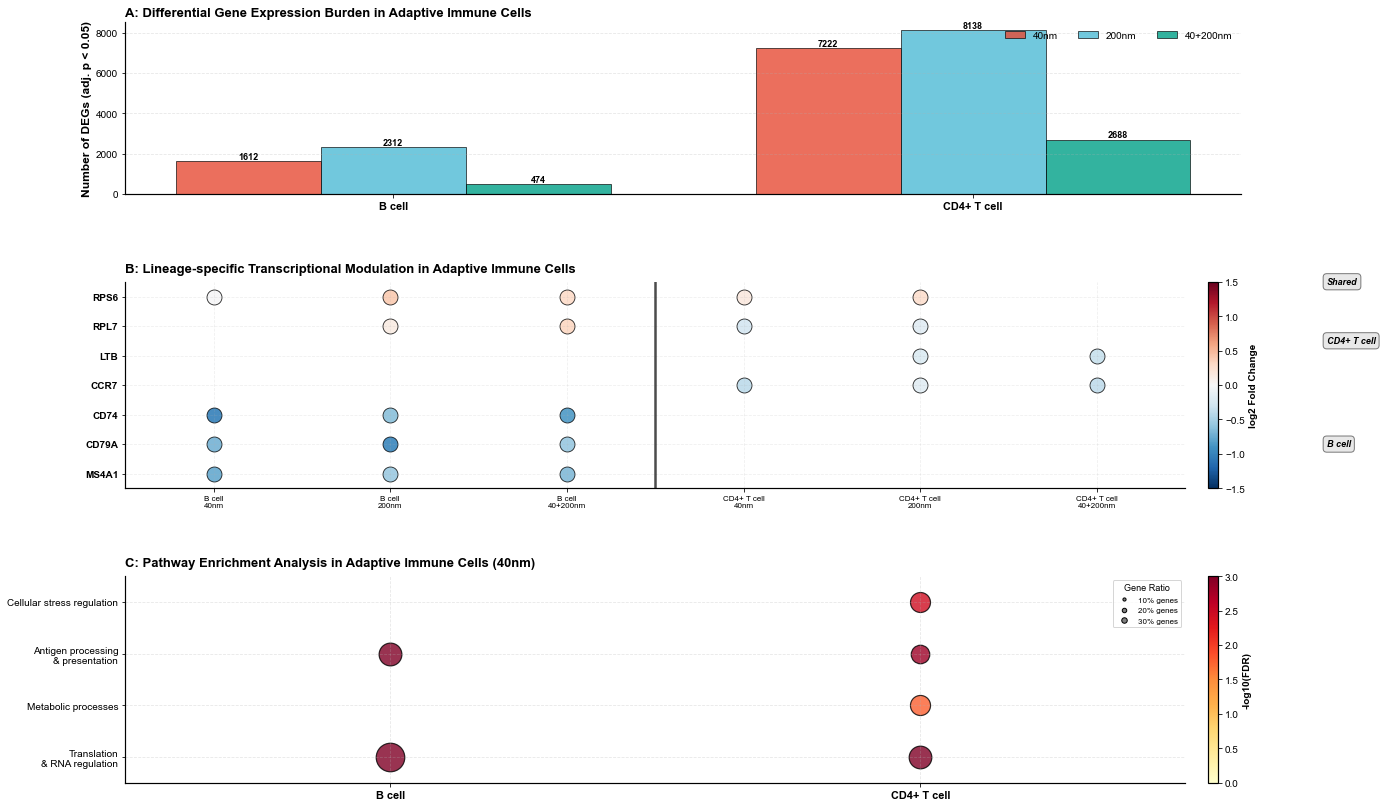

In [2]:
# ============================================================
# FIGURE 5: Adaptive Immune Cells - Restrained and Lineage-specific Responses
# ============================================================
logger.info("Creating Figure 5 (Adaptive immune cells)...")

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 1, hspace=0.45, height_ratios=[1, 1.2, 1.2])

# ============================================================
# Panel 5A: DEG Burden in Adaptive Immune Cells
# ============================================================
logger.info("  Panel 5A: DEG burden in B cells and CD4+ T cells...")
ax_5a = fig.add_subplot(gs[0])

adaptive_cells = ['B cell', 'CD4+ T cell']
deg_data = []

for sample_num, sample_name in [(1, '40nm'), (2, '200nm'), (3, '40+200nm')]:
    for ct in adaptive_cells:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
        if sheet_name in de_results:
            df = de_results[sheet_name]
            sig_df = df[df['pvals_adj'] < 0.05]
            n_degs = len(sig_df)
            n_up = len(sig_df[sig_df['logfoldchanges'] > 0])
            n_down = len(sig_df[sig_df['logfoldchanges'] < 0])
            deg_data.append({
                'Cell Type': ct,
                'Sample': sample_name,
                'Total': n_degs,
                'Up': n_up,
                'Down': n_down
            })
            logger.info(f"    {ct} - {sample_name}: {n_degs} DEGs ({n_up} up, {n_down} down)")

if deg_data:
    deg_df = pd.DataFrame(deg_data)
    x = np.arange(len(adaptive_cells))
    width = 0.25
    samples = ['40nm', '200nm', '40+200nm']

    for i, sample in enumerate(samples):
        sample_data = deg_df[deg_df['Sample'] == sample]
        heights = [sample_data[sample_data['Cell Type'] == ct]['Total'].values[0]
                   if len(sample_data[sample_data['Cell Type'] == ct]) > 0 else 0
                   for ct in adaptive_cells]

        bars = ax_5a.bar(x + i*width - width, heights, width, label=sample,
                         color=SAMPLE_COLORS[sample], edgecolor='black', linewidth=0.8, alpha=0.8)

        # Add count labels
        for j, (bar, height) in enumerate(zip(bars, heights)):
            if height > 0:
                ax_5a.text(bar.get_x() + bar.get_width()/2, height + 10,
                          str(int(height)), ha='center', va='bottom', fontsize=9, fontweight='bold')

    ax_5a.set_xticks(x)
    ax_5a.set_xticklabels(adaptive_cells, fontsize=11, fontweight='bold')
    ax_5a.set_ylabel('Number of DEGs (adj. p < 0.05)', fontweight='bold', fontsize=12)
    ax_5a.set_title('A: Differential Gene Expression Burden in Adaptive Immune Cells',
                    fontsize=13, fontweight='bold', loc='left')
    ax_5a.legend(frameon=False, fontsize=10, ncol=3, loc='upper right')
    ax_5a.spines['top'].set_visible(False)
    ax_5a.spines['right'].set_visible(False)
    ax_5a.grid(axis='y', alpha=0.3, linestyle='--')

# ============================================================
# Panel 5B: Lineage-specific Gene Modulation
# ============================================================
logger.info("  Panel 5B: Lineage-specific transcriptional modulation...")
ax_5b = fig.add_subplot(gs[1])

# Define lineage-specific genes
lineage_genes = {
    'B cell': ['MS4A1', 'CD79A', 'CD74'],  # MS4A1 (CD20), CD79A, CD74
    'CD4+ T cell': ['CCR7', 'LTB'],  # CCR7, LTB
    'Shared': ['RPL7', 'RPS6']  # Translation/RNA
}

# Flatten gene list for y-axis
all_genes = []
gene_categories = []
for category, genes in lineage_genes.items():
    all_genes.extend(genes)
    gene_categories.extend([category] * len(genes))

# Collect data for dot plot
dot_data = []
for gene, category in zip(all_genes, gene_categories):
    # Determine which cell types to check based on category
    if category == 'B cell':
        cell_types_to_check = ['B cell']
    elif category == 'CD4+ T cell':
        cell_types_to_check = ['CD4+ T cell']
    else:  # Shared
        cell_types_to_check = ['B cell', 'CD4+ T cell']

    for ct in cell_types_to_check:
        for sample_num, sample_name in [(1, '40nm'), (2, '200nm'), (3, '40+200nm')]:
            sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
            if sheet_name in de_results:
                gene_data = de_results[sheet_name][de_results[sheet_name]['names'] == gene]
                if len(gene_data) > 0:
                    logfc = gene_data['logfoldchanges'].values[0]
                    pval_adj = gene_data['pvals_adj'].values[0]
                    # For percentage expressing, we'll use a proxy based on significance
                    pct_expr = 75 if pval_adj < 0.01 else (50 if pval_adj < 0.05 else 25)

                    dot_data.append({
                        'Gene': gene,
                        'Cell Type': ct,
                        'Condition': sample_name,
                        'log2FC': logfc,
                        'pval_adj': pval_adj,
                        'pct_expr': pct_expr,
                        'Category': category
                    })

if dot_data:
    dot_df = pd.DataFrame(dot_data)

    # Create column labels (Cell Type x Condition)
    columns = []
    col_labels = []
    for ct in adaptive_cells:
        for sample in ['40nm', '200nm', '40+200nm']:
            columns.append((ct, sample))
            col_labels.append(f"{ct}\n{sample}")

    # Plot dots
    for i, gene in enumerate(all_genes):
        for j, (ct, sample) in enumerate(columns):
            gene_data = dot_df[(dot_df['Gene'] == gene) &
                              (dot_df['Cell Type'] == ct) &
                              (dot_df['Condition'] == sample)]

            if len(gene_data) > 0:
                logfc = gene_data['log2FC'].values[0]
                pct = gene_data['pct_expr'].values[0]

                # Size based on expression percentage
                size = pct * 3

                # Color based on log2FC
                ax_5b.scatter(j, i, s=size, c=logfc, cmap='RdBu_r',
                            vmin=-1.5, vmax=1.5, edgecolors='black',
                            linewidths=0.8, alpha=0.9)

    # Set axes
    ax_5b.set_xticks(np.arange(len(col_labels)))
    ax_5b.set_xticklabels(col_labels, fontsize=8, rotation=0, ha='center')
    ax_5b.set_yticks(np.arange(len(all_genes)))
    ax_5b.set_yticklabels(all_genes, fontsize=10, fontweight='bold')
    ax_5b.set_xlim(-0.5, len(col_labels) - 0.5)
    ax_5b.set_ylim(-0.5, len(all_genes) - 0.5)

    # Add vertical separators between cell types
    ax_5b.axvline(x=2.5, color='black', linewidth=2.5, alpha=0.7)

    # Add category labels on the right
    y_positions = {'B cell': 1, 'CD4+ T cell': 4.5, 'Shared': 6.5}
    for category, y_pos in y_positions.items():
        ax_5b.text(len(col_labels) + 0.3, y_pos, category,
                  fontsize=9, fontweight='bold', style='italic',
                  va='center', rotation=0,
                  bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgray', alpha=0.5))

    # Colorbar
    sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin=-1.5, vmax=1.5))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax_5b, fraction=0.03, pad=0.02)
    cbar.set_label('log2 Fold Change', fontsize=10, fontweight='bold')

    ax_5b.set_title('B: Lineage-specific Transcriptional Modulation in Adaptive Immune Cells',
                    fontsize=13, fontweight='bold', loc='left', pad=10)
    ax_5b.grid(True, alpha=0.2, linestyle='--')
    ax_5b.spines['top'].set_visible(False)
    ax_5b.spines['right'].set_visible(False)

# ============================================================
# Panel 5C: Pathway Enrichment in Adaptive Cells
# ============================================================
logger.info("  Panel 5C: Pathway enrichment in adaptive cells...")
ax_5c = fig.add_subplot(gs[2])

# Define pathway themes (same categories as earlier for consistency)
pathway_themes = {
    'Translation and RNA regulation': ['translation', 'ribosom', 'RNA processing', 'RNA binding', 'mRNA'],
    'Metabolic processes': ['metabolic', 'metabolism', 'glycolysis', 'lipid'],
    'Antigen processing and presentation': ['antigen', 'MHC', 'HLA', 'presentation'],
    'Cellular stress regulation': ['stress', 'response', 'DNA damage', 'apoptosis']
}

# Collect pathway data for adaptive cells
pathway_plot_data = []
for ct in adaptive_cells:
    # Use 40nm (sample_1) as primary condition
    for sample_num, sample_name in [(1, '40nm')]:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
        if sheet_name in gse_results:
            df = gse_results[sheet_name]
            sig_pathways = df[df['FDR q-val'] < 0.25]  # Use relaxed threshold

            # For each theme, find matching pathways
            for theme, keywords in pathway_themes.items():
                matching = sig_pathways[
                    sig_pathways['Term'].str.lower().str.contains('|'.join(keywords), na=False)
                ]

                if len(matching) > 0:
                    # Take the top pathway for this theme
                    top = matching.nsmallest(1, 'FDR q-val').iloc[0]

                    # Get gene ratio
                    gene_ratio = 0
                    if 'Tag %' in top and pd.notna(top['Tag %']):
                        tag_str = str(top['Tag %'])
                        if '/' in tag_str:
                            parts = tag_str.split('/')
                            if len(parts) == 2:
                                try:
                                    numerator = float(parts[0])
                                    denominator = float(parts[1])
                                    if denominator > 0:
                                        gene_ratio = numerator / denominator
                                except:
                                    gene_ratio = 0

                    pathway_plot_data.append({
                        'Cell Type': ct,
                        'Theme': theme,
                        'FDR': top['FDR q-val'],
                        'Gene Ratio': gene_ratio,
                        'NES': top.get('NES', 0)
                    })

if pathway_plot_data:
    pathway_df = pd.DataFrame(pathway_plot_data)

    # Create dot plot
    themes = list(pathway_themes.keys())
    y_pos = np.arange(len(themes))

    for i, ct in enumerate(adaptive_cells):
        ct_data = pathway_df[pathway_df['Cell Type'] == ct]

        for theme in themes:
            theme_data = ct_data[ct_data['Theme'] == theme]
            if len(theme_data) > 0:
                fdr = theme_data['FDR'].values[0]
                gene_ratio = theme_data['Gene Ratio'].values[0]

                # Size based on gene ratio, color based on -log10(FDR)
                size = gene_ratio * 1000
                color_val = -np.log10(max(fdr, 1e-10))

                ax_5c.scatter(i, list(themes).index(theme),
                            s=size, c=color_val, cmap='YlOrRd',
                            vmin=0, vmax=3, edgecolors='black',
                            linewidths=1.2, alpha=0.8)

    ax_5c.set_xticks(np.arange(len(adaptive_cells)))
    ax_5c.set_xticklabels(adaptive_cells, fontsize=11, fontweight='bold')
    ax_5c.set_yticks(y_pos)
    ax_5c.set_yticklabels([t.replace(' and ', '\n& ') for t in themes], fontsize=10)
    ax_5c.set_xlim(-0.5, len(adaptive_cells) - 0.5)
    ax_5c.set_ylim(-0.5, len(themes) - 0.5)

    # Colorbar
    sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=0, vmax=3))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax_5c, fraction=0.03, pad=0.02)
    cbar.set_label('-log10(FDR)', fontsize=10, fontweight='bold')

    # Add size legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
               markersize=np.sqrt(0.1*1000/10), label='10% genes', markeredgecolor='black'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
               markersize=np.sqrt(0.2*1000/10), label='20% genes', markeredgecolor='black'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
               markersize=np.sqrt(0.3*1000/10), label='30% genes', markeredgecolor='black')
    ]
    ax_5c.legend(handles=legend_elements, loc='upper right', fontsize=8,
                title='Gene Ratio', title_fontsize=9, frameon=True)

    ax_5c.set_title('C: Pathway Enrichment Analysis in Adaptive Immune Cells (40nm)',
                    fontsize=13, fontweight='bold', loc='left', pad=10)
    ax_5c.grid(True, alpha=0.3, linestyle='--')
    ax_5c.spines['top'].set_visible(False)
    ax_5c.spines['right'].set_visible(False)

    logger.info(f"    Plotted {len(pathway_plot_data)} pathway-cell type combinations")
else:
    # Fallback if no pathway data
    ax_5c.text(0.5, 0.5, 'Limited pathway enrichment in adaptive cells\n(FDR < 0.25)',
              ha='center', va='center', transform=ax_5c.transAxes,
              fontsize=12, style='italic',
              bbox=dict(boxstyle='round,pad=1', facecolor='lightyellow', alpha=0.5))
    ax_5c.set_title('C: Pathway Enrichment in Adaptive Cells',
                    fontsize=13, fontweight='bold', loc='left')
    ax_5c.axis('off')

plt.savefig(FIG_DIR / 'Figure_5_adaptive_cells.pdf', bbox_inches='tight')
plt.savefig(FIG_DIR / 'Figure_5_adaptive_cells.png', dpi=300, bbox_inches='tight')
logger.info("✓ Figure 5 complete\n")

# ============================================================
# FIGURE 6: Integrative Principles of Immune Transcriptional Organization
# ============================================================

23:15:01 - INFO - Creating Figure 6 (Integrative analysis)...
23:15:01 - INFO -   Panel 6A: DEG burden vs pathway organization...
23:15:01 - INFO -     CD14+ monocyte - 40nm: 3529 DEGs, 31 pathways
23:15:01 - INFO -     CD14+ monocyte - 200nm: 5674 DEGs, 37 pathways
23:15:01 - INFO -     CD14+ monocyte - 40+200nm: 3255 DEGs, 39 pathways
23:15:01 - INFO -     B cell - 40nm: 1612 DEGs, 47 pathways
23:15:01 - INFO -     B cell - 200nm: 2312 DEGs, 34 pathways
23:15:01 - INFO -     B cell - 40+200nm: 474 DEGs, 17 pathways
23:15:01 - INFO -     CD4+ T cell - 40nm: 7222 DEGs, 91 pathways
23:15:01 - INFO -     CD4+ T cell - 200nm: 8138 DEGs, 68 pathways
23:15:01 - INFO -     CD4+ T cell - 40+200nm: 2688 DEGs, 36 pathways
23:15:01 - INFO -   Panel 6B: Non-additive transcriptional responses...
23:15:01 - INFO -     CD14+ monocyte: Expected=34.0, Observed=39
23:15:01 - INFO -     B cell: Expected=40.5, Observed=17
23:15:01 - INFO -   Panel 6C: Conceptual model schematic...
23:15:01 - INFO -     G

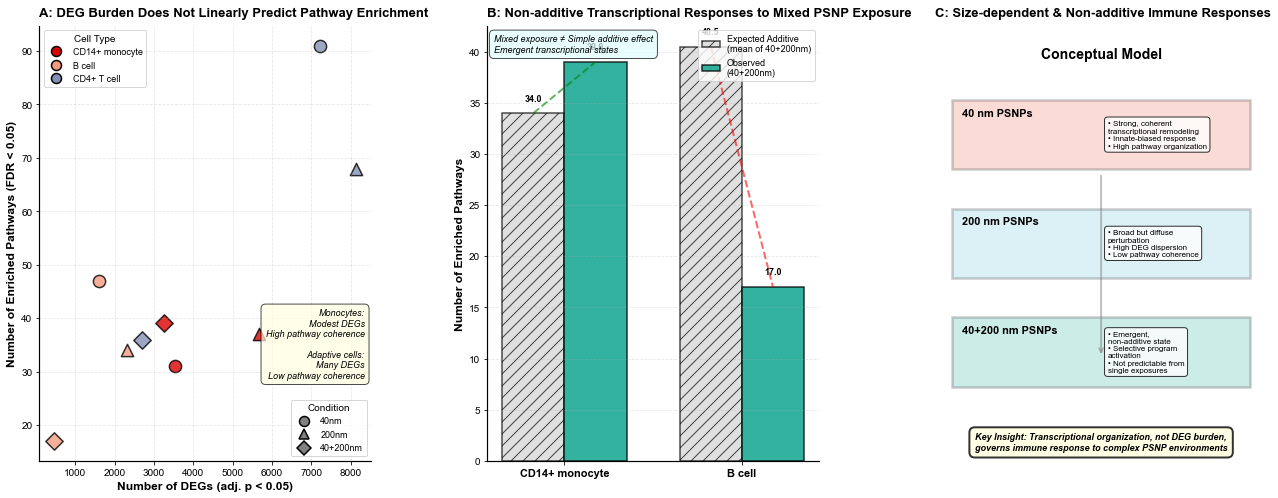

In [2]:

logger.info("Creating Figure 6 (Integrative analysis)...")

fig = plt.figure(figsize=(22, 8))
gs = fig.add_gridspec(1, 3, hspace=0.3, wspace=0.35)

# ============================================================
# Panel 6A: DEG Burden vs Pathway Enrichment
# ============================================================
logger.info("  Panel 6A: DEG burden vs pathway organization...")
ax_6a = fig.add_subplot(gs[0])

# Collect data: DEG count vs pathway count for each cell type × condition
scatter_data = []

# Cell types to include (start with all, can be reduced later)
cell_types_to_plot = ['CD14+ monocyte', 'B cell', 'CD4+ T cell']

for ct in cell_types_to_plot:
    for sample_num, sample_name in [(1, '40nm'), (2, '200nm'), (3, '40+200nm')]:
        sheet_name = f"{ct.replace(' ', '_')}_sample_{sample_num}"
        
        # Get DEG count
        if sheet_name in de_results:
            n_degs = len(de_results[sheet_name][de_results[sheet_name]['pvals_adj'] < 0.05])
        else:
            n_degs = 0
        
        # Get pathway count (FDR < 0.05)
        if sheet_name in gse_results:
            n_pathways = len(gse_results[sheet_name][gse_results[sheet_name]['FDR q-val'] < 0.05])
        else:
            n_pathways = 0
        
        if n_degs > 0 or n_pathways > 0:
            scatter_data.append({
                'Cell Type': ct,
                'Condition': sample_name,
                'DEGs': n_degs,
                'Pathways': n_pathways
            })
            logger.info(f"    {ct} - {sample_name}: {n_degs} DEGs, {n_pathways} pathways")

if scatter_data:
    scatter_df = pd.DataFrame(scatter_data)
    
    # Define shapes for conditions
    markers = {'40nm': 'o', '200nm': '^', '40+200nm': 'D'}
    
    # Plot each cell type with different color, each condition with different shape
    for ct in cell_types_to_plot:
        ct_data = scatter_df[scatter_df['Cell Type'] == ct]
        
        for condition in ['40nm', '200nm', '40+200nm']:
            cond_data = ct_data[ct_data['Condition'] == condition]
            
            if len(cond_data) > 0:
                ax_6a.scatter(cond_data['DEGs'], cond_data['Pathways'],
                            s=150, alpha=0.8,
                            color=CELL_TYPE_COLORS[ct],
                            marker=markers[condition],
                            edgecolors='black', linewidths=1.5,
                            label=f"{ct} - {condition}" if ct == cell_types_to_plot[0] else "")
    
    ax_6a.set_xlabel('Number of DEGs (adj. p < 0.05)', fontweight='bold', fontsize=12)
    ax_6a.set_ylabel('Number of Enriched Pathways (FDR < 0.05)', fontweight='bold', fontsize=12)
    ax_6a.set_title('A: DEG Burden Does Not Linearly Predict Pathway Enrichment',
                    fontsize=13, fontweight='bold', loc='left', pad=10)
    
    # Add custom legend
    from matplotlib.lines import Line2D
    
    # Cell type legend
    ct_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=CELL_TYPE_COLORS[ct],
                        markersize=10, label=ct, markeredgecolor='black', markeredgewidth=1.5)
                 for ct in cell_types_to_plot]
    
    # Condition legend
    cond_handles = [Line2D([0], [0], marker=markers[cond], color='w', markerfacecolor='gray',
                          markersize=10, label=cond, markeredgecolor='black', markeredgewidth=1.5)
                   for cond in ['40nm', '200nm', '40+200nm']]
    
    # Create two legends
    leg1 = ax_6a.legend(handles=ct_handles, loc='upper left', fontsize=9,
                       title='Cell Type', title_fontsize=10, frameon=True)
    ax_6a.add_artist(leg1)
    ax_6a.legend(handles=cond_handles, loc='lower right', fontsize=9,
                title='Condition', title_fontsize=10, frameon=True)
    
    ax_6a.spines['top'].set_visible(False)
    ax_6a.spines['right'].set_visible(False)
    ax_6a.grid(True, alpha=0.3, linestyle='--')
    
    # Add annotation for key insight
    ax_6a.text(0.98, 0.35, 'Monocytes:\nModest DEGs\nHigh pathway coherence\n\nAdaptive cells:\nMany DEGs\nLow pathway coherence',
              transform=ax_6a.transAxes, fontsize=9, style='italic',
              ha='right', va='top',
              bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.7))

# ============================================================
# Panel 6B: Non-additive Response (Expected vs Observed)
# ============================================================
logger.info("  Panel 6B: Non-additive transcriptional responses...")
ax_6b = fig.add_subplot(gs[1])

# For selected cell types (Monocytes + B cells), compare:
# Expected = mean(40nm, 200nm)
# Observed = 40+200nm

comparison_cells = ['CD14+ monocyte', 'B cell']
comparison_data = []

for ct in comparison_cells:
    # Get pathway counts
    pathways_40 = 0
    pathways_200 = 0
    pathways_mix = 0
    
    sheet_40 = f"{ct.replace(' ', '_')}_sample_1"
    sheet_200 = f"{ct.replace(' ', '_')}_sample_2"
    sheet_mix = f"{ct.replace(' ', '_')}_sample_3"
    
    if sheet_40 in gse_results:
        pathways_40 = len(gse_results[sheet_40][gse_results[sheet_40]['FDR q-val'] < 0.05])
    if sheet_200 in gse_results:
        pathways_200 = len(gse_results[sheet_200][gse_results[sheet_200]['FDR q-val'] < 0.05])
    if sheet_mix in gse_results:
        pathways_mix = len(gse_results[sheet_mix][gse_results[sheet_mix]['FDR q-val'] < 0.05])
    
    # Calculate expected (mean of 40 and 200)
    expected = (pathways_40 + pathways_200) / 2.0
    observed = pathways_mix
    
    comparison_data.append({
        'Cell Type': ct,
        'Expected': expected,
        'Observed': observed
    })
    
    logger.info(f"    {ct}: Expected={expected:.1f}, Observed={observed}")

if comparison_data:
    comp_df = pd.DataFrame(comparison_data)
    
    x = np.arange(len(comparison_cells))
    width = 0.35
    
    # Plot expected vs observed
    bars_exp = ax_6b.bar(x - width/2, comp_df['Expected'], width,
                         label='Expected Additive\n(mean of 40+200nm)',
                         color='lightgray', edgecolor='black', linewidth=1.5,
                         alpha=0.7, hatch='//')
    bars_obs = ax_6b.bar(x + width/2, comp_df['Observed'], width,
                         label='Observed\n(40+200nm)',
                         color=SAMPLE_COLORS['40+200nm'], edgecolor='black',
                         linewidth=1.5, alpha=0.8)
    
    # Add value labels
    for bars in [bars_exp, bars_obs]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax_6b.text(bar.get_x() + bar.get_width()/2, height + 1,
                          f'{height:.1f}', ha='center', va='bottom',
                          fontsize=9, fontweight='bold')
    
    # Add lines connecting expected to observed
    for i, (exp, obs) in enumerate(zip(comp_df['Expected'], comp_df['Observed'])):
        ax_6b.plot([i - width/2, i + width/2], [exp, obs],
                  color='red' if obs < exp else 'green',
                  linestyle='--', linewidth=2, alpha=0.6)
    
    ax_6b.set_xticks(x)
    ax_6b.set_xticklabels(comparison_cells, fontsize=11, fontweight='bold')
    ax_6b.set_ylabel('Number of Enriched Pathways', fontweight='bold', fontsize=12)
    ax_6b.set_title('B: Non-additive Transcriptional Responses to Mixed PSNP Exposure',
                    fontsize=13, fontweight='bold', loc='left', pad=10)
    ax_6b.legend(fontsize=9, frameon=True, loc='upper right')
    ax_6b.spines['top'].set_visible(False)
    ax_6b.spines['right'].set_visible(False)
    ax_6b.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add interpretation
    ax_6b.text(0.02, 0.98, 'Mixed exposure ≠ Simple additive effect\nEmergent transcriptional states',
              transform=ax_6b.transAxes, fontsize=9, style='italic',
              ha='left', va='top',
              bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcyan', alpha=0.7))

# ============================================================
# Panel 6C: Conceptual Model (Schematic)
# ============================================================
logger.info("  Panel 6C: Conceptual model schematic...")
ax_6c = fig.add_subplot(gs[2])

# Create schematic illustration
ax_6c.text(0.5, 0.95, 'Conceptual Model', ha='center', va='top',
          fontsize=14, fontweight='bold', transform=ax_6c.transAxes)

# Three exposure scenarios with visual representation
y_positions = [0.75, 0.50, 0.25]
scenarios = [
    {
        'title': '40 nm PSNPs',
        'features': ['Strong, coherent\ntranscriptional remodeling',
                    'Innate-biased response',
                    'High pathway organization'],
        'color': SAMPLE_COLORS['40nm']
    },
    {
        'title': '200 nm PSNPs',
        'features': ['Broad but diffuse\nperturbation',
                    'High DEG dispersion',
                    'Low pathway coherence'],
        'color': SAMPLE_COLORS['200nm']
    },
    {
        'title': '40+200 nm PSNPs',
        'features': ['Emergent,\nnon-additive state',
                    'Selective program\nactivation',
                    'Not predictable from\nsingle exposures'],
        'color': SAMPLE_COLORS['40+200nm']
    }
]

for y, scenario in zip(y_positions, scenarios):
    # Draw colored box
    ax_6c.add_patch(plt.Rectangle((0.05, y - 0.08), 0.9, 0.16,
                                  facecolor=scenario['color'], alpha=0.2,
                                  edgecolor='black', linewidth=2.5,
                                  transform=ax_6c.transAxes))
    
    # Title
    ax_6c.text(0.08, y + 0.05, scenario['title'],
              fontsize=11, fontweight='bold', transform=ax_6c.transAxes,
              va='center')
    
    # Features (bullet points)
    feature_text = '\n'.join(['• ' + f for f in scenario['features']])
    ax_6c.text(0.52, y, feature_text,
              fontsize=8, transform=ax_6c.transAxes,
              va='center', ha='left',
              bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8))

# Add connecting arrows to show relationship
arrow_props = dict(arrowstyle='->', lw=2, color='gray', alpha=0.5)
ax_6c.annotate('', xy=(0.5, 0.24), xytext=(0.5, 0.66),
              xycoords='axes fraction', arrowprops=arrow_props)

ax_6c.set_title('C: Size-dependent & Non-additive Immune Responses',
               fontsize=13, fontweight='bold', loc='left', pad=10)
ax_6c.axis('off')

# Add overall interpretation at bottom
ax_6c.text(0.5, 0.02,
          'Key Insight: Transcriptional organization, not DEG burden,\ngoverns immune response to complex PSNP environments',
          ha='center', va='bottom', fontsize=9, fontweight='bold', style='italic',
          transform=ax_6c.transAxes,
          bbox=dict(boxstyle='round,pad=0.6', facecolor='lightyellow', alpha=0.8, edgecolor='black', linewidth=2))

logger.info("    Generated conceptual model")

# Save figure
plt.savefig(FIG_DIR / 'Figure_6_integrative_analysis.pdf', bbox_inches='tight')
plt.savefig(FIG_DIR / 'Figure_6_integrative_analysis.png', dpi=300, bbox_inches='tight')
logger.info("✓ Figure 6 complete\n")